### 데이터 불러오기 and Resize

In [1]:
from PIL import Image
import glob
import os

print("import")

import


>  Change the image of scissors 224 * 224 to 28 * 28 size

In [34]:
def resize_images(img_path):
    images = glob.glob(img_path + " /*.jpg")
    
    print(len(images), " images to be resized.")
    
    # Save 28 * 28 sizes with using for statemne all file
    target_size = (28, 28)
    for img in images:
        old_img = image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(len(images), " images resized.")

# scissors images stored '*.jpg' at project directory read and save
image_dir_path = os.getenv("HOME") + "/aiffel/tensorflow/MiniProject/rock_scissor_paper/train_data_1/scissor/scissor_1"
resize_images(image_dir_path)

print("scissors resize completion")

0  images to be resized.
0  images resized.
scissors resize completion


> Change the image of rock 224 * 224 to 28 * 28 size

In [ ]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # Save 28 * 28 sizes with using for statemne all file.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# rock images stored '*.jpg' at project directory read and save
image_dir_path = os.getenv("HOME") + "/aiffel/tensorflow/MiniProject/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("rock resize completion")

> Change the image of paper 224 * 224 to 28 * 28 size

In [ ]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # Save 28 * 28 sizes with using for statemne all file.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# paper images stored '*.jpg' at project directory read and save
image_dir_path = os.getenv("HOME") + "/aiffel/tensorflow/MiniProject/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("paper resize completion")

> making a Function 

In [15]:
import numpy as np
from PIL import Image
import glob

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/tensorflow/MiniProject/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


> os를 이용한 file name rename

In [8]:
import os

file_path = os.getenv("HOME") + "/aiffel/tensorflow/MiniProject/rock_scissor_paper/scissor"
file_names = os.listdir(file_path)
file_names

i = 200
for name in file_names:
    src = os.path.join(file_path, name)
    dst = str(i) + '.jpg'
    dst = os.path.join(file_path, dst)
    os.rename(src, dst)
    i += 1

> 이미지 불러오기

라벨:  0


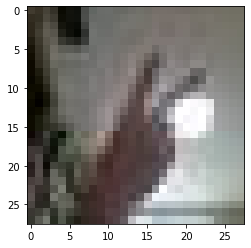

In [16]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

> 네트워크 설계

In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()

model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                51264     
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

> 네트워크 학습

In [26]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=20)

Epoch 1/20
10/10 [==============================] - 0s 3ms/step - loss: 0.0613 - accuracy: 0.9900
Epoch 2/20
10/10 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 1.0000
Epoch 3/20
10/10 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.9933
Epoch 4/20
10/10 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 0.9967
Epoch 5/20
10/10 [==============================] - 0s 3ms/step - loss: 0.0162 - accuracy: 1.0000
Epoch 6/20
10/10 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 1.0000
Epoch 7/20
10/10 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 1.0000
Epoch 8/20
10/10 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 1.0000
Epoch 9/20
10/10 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 1.0000
Epoch 10/20
10/10 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 11/20
10/10 [

> test data set

In [19]:
import numpy as np
from PIL import Image
import glob

def load_data_test(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("실험데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/tensorflow/MiniProject/rock_scissor_paper/test_data"
(x_test, y_test)=load_data_test(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

실험데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


> evaluate api 이용해서 훈련시킨 model로 test_accuracy를 측정 (loss, acy)

In [28]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 9.0016 - accuracy: 0.3433
test_loss: 9.001640319824219 
test_accuracy: 0.34333333373069763


> 하이퍼 파라미터 값 변경 후 재학습

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()

model.add(keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                204864    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

In [7]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=15)

Epoch 1/15
57/57 [==============================] - 3s 5ms/step - loss: 0.9587 - accuracy: 0.5478
Epoch 2/15
57/57 [==============================] - 0s 3ms/step - loss: 0.4174 - accuracy: 0.8578
Epoch 3/15
57/57 [==============================] - 0s 3ms/step - loss: 0.1497 - accuracy: 0.9606
Epoch 4/15
57/57 [==============================] - 0s 3ms/step - loss: 0.0739 - accuracy: 0.9833
Epoch 5/15
57/57 [==============================] - 0s 3ms/step - loss: 0.0362 - accuracy: 0.9933
Epoch 6/15
57/57 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.9950
Epoch 7/15
57/57 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9967
Epoch 8/15
57/57 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9994
Epoch 9/15
57/57 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.9994
Epoch 10/15
57/57 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 11/15
57/57 [

test_data 재측정

In [8]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 11.4321 - accuracy: 0.3400
test_loss: 11.432121276855469 
test_accuracy: 0.3400000035762787


파라미터 값 조정으로 인식률 향상에 어려움이 있어 <br/>
<br/>
모델을 학습시킬 데이터량을 증가하였음. 각 클래스 별 600개씩 1800개

In [29]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image
import glob

def load_data3(img_path, number_of_data=1800):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor_1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/scissor_2/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1
        
    for file in glob.iglob(img_path+'/scissor_3/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1
        
    for file in glob.iglob(img_path+'/scissors_4/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1
        
    for file in glob.iglob(img_path+'/rock_1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/rock_2/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/rock_3/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
        
    for file in glob.iglob(img_path+'/rock_4/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1 
        
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    for file in glob.iglob(img_path+'/paper_1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels


image_dir_path4 = os.getenv("HOME") + "/aiffel/tensorflow/MiniProject/rock_scissor_paper/train_data_1"
(x_train, y_train)=load_data3(image_dir_path4)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1800 입니다.
x_train shape: (1800, 28, 28, 3)
y_train shape: (1800,)


In [10]:
model=keras.models.Sequential()

model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                51264     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

In [30]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=20)

Epoch 1/20
57/57 [==============================] - 0s 3ms/step - loss: 1.0833 - accuracy: 0.6606
Epoch 2/20
57/57 [==============================] - 0s 3ms/step - loss: 0.3007 - accuracy: 0.9011
Epoch 3/20
57/57 [==============================] - 0s 3ms/step - loss: 0.1458 - accuracy: 0.9672
Epoch 4/20
57/57 [==============================] - 0s 3ms/step - loss: 0.0742 - accuracy: 0.9872
Epoch 5/20
57/57 [==============================] - 0s 3ms/step - loss: 0.0433 - accuracy: 0.9950
Epoch 6/20
57/57 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9983
Epoch 7/20
57/57 [==============================] - 0s 3ms/step - loss: 0.0180 - accuracy: 0.9983
Epoch 8/20
57/57 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9983
Epoch 9/20
57/57 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 0.9994
Epoch 10/20
57/57 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9994
Epoch 11/20
57/57 [

In [31]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 15.3495 - accuracy: 0.3333
test_loss: 15.349529266357422 
test_accuracy: 0.3333333432674408


### 회고

양질의 데이터로 모델을 학습시켜야 정확도가 높아진다는 걸 확인할 수 있었음.<br/>
질이 떨어지는 데이터로 학습시킨 후 파라미터 값 및 학습 데이터의 양을 늘린다고 해도 정확도의 상승을 기대하긴 어려움.